# Feature Extraction w/ Point Cloud Data
## Team LeakSeek - 10/31/2023

In [1]:
# The below is required for matplotlib animations.
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from matplotlib import animation

In [2]:
# Note: The preliminary data in typical point cloud files (i.e., VERSION, FIELDS, ..., DATA) were manually removed and replaced
#   by the "x y z rgb" to define the df columns when CSV is read.
df_orig = pd.read_csv('manifold1.pcd.txt', sep=' ')
df_orig

,x,y,z,rgb
0,-94.954842,-181.61417,844.00574,4278256129
1,-93.893166,-181.49379,843.03510,4278321922
2,-93.339684,-181.40636,842.70776,4278321922
3,-92.867958,-181.34851,842.40363,4278321922
4,-92.347496,-181.32379,842.35681,4278321922
...,...,...,...,...
99837,-113.892330,122.35071,757.70978,4279504393
99838,-113.416750,122.27309,757.70654,4279373577
99839,-113.035190,122.34882,757.70789,4279438857
99840,-112.553400,122.26440,757.66956,4279176199


In [3]:
# Extract rgb values into separate columns.
# Note: left most bits in rgb column are "alpha" values?
df_copy = df_orig.copy()
df_copy['color'] = df_copy['rgb'].map(lambda rgb: "#{:02x}{:02x}{:02x}".format(rgb >> 16 & 0xff, rgb >> 8 & 0xff, rgb & 0xff))
df_copy

,x,y,z,rgb,color
0,-94.954842,-181.61417,844.00574,4278256129,#010201
1,-93.893166,-181.49379,843.03510,4278321922,#020302
2,-93.339684,-181.40636,842.70776,4278321922,#020302
3,-92.867958,-181.34851,842.40363,4278321922,#020302
4,-92.347496,-181.32379,842.35681,4278321922,#020302
...,...,...,...,...,...
99837,-113.892330,122.35071,757.70978,4279504393,#140e09
99838,-113.416750,122.27309,757.70654,4279373577,#120f09
99839,-113.035190,122.34882,757.70789,4279438857,#130e09
99840,-112.553400,122.26440,757.66956,4279176199,#0f0c07


In [4]:
# Visualize the given point cloud dataframe.
def visualize_pcd(df, zoom=0.05):
    fig = plt.figure(figsize=(10, 7))
    ax = plt.axes(projection='3d')

    ax.scatter3D(df['x'], df['y'], df['z'], s=1, color=df['color'])
    ax.view_init(-85, 0)
    
    # Zooming out so that features show up better (if zoomed in, will just look like a bunch of random points).
    ax.margins(zoom)
    
    plt.show()

<IPython.core.display.Javascript object>


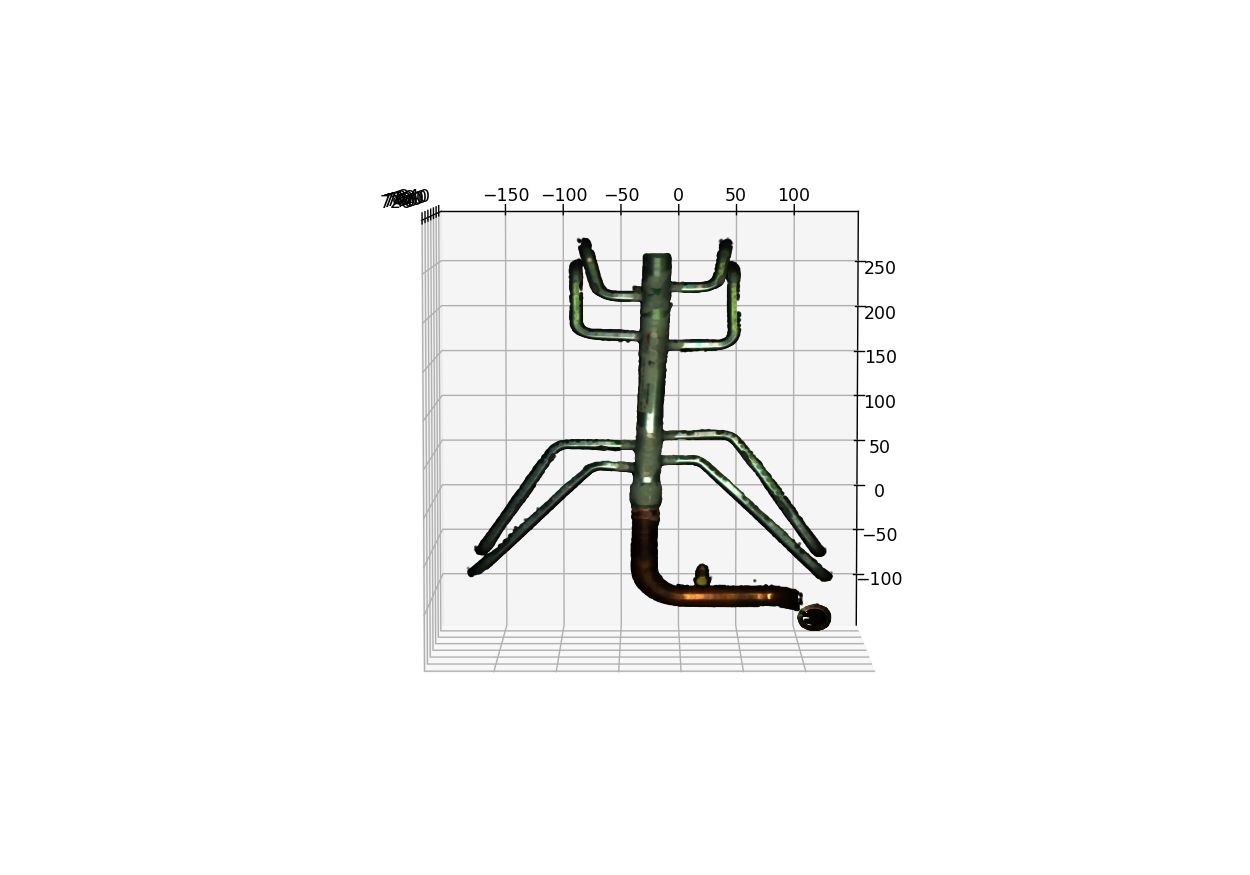

In [5]:
# Still visualization of manifold top down view.
# Note: the left axis is z, the middle axis is y, and the right axis is x.
visualize_pcd(df_copy)

In [6]:
# Write point cloud dataframe to text file in point cloud file format.
def write_pcd_file(df, filename):
    # Write preliminary data.
    f = open(filename, "w")
    f.write("# .PCD v0.7 - Point Cloud Data file format\n")
    f.write("VERSION 0.7\n")
    f.write("FIELDS x y z rgb\n")
    f.write("SIZE 4 4 4 4\n")
    f.write("TYPE F F F U\n")
    f.write("COUNT 1 1 1 1\n")
    f.write("WIDTH {}\n".format(len(df)))
    f.write("HEIGHT 1\n")
    f.write("VIEWPOINT 0 0 0 1 0 0 0\n")
    f.write("POINTS {}\n".format(len(df)))
    f.write("DATA ascii\n")
    f.close()

    # Write point cloud data.
    df.to_csv(filename, header=None, index=None, sep=' ', mode='a')

<IPython.core.display.Javascript object>


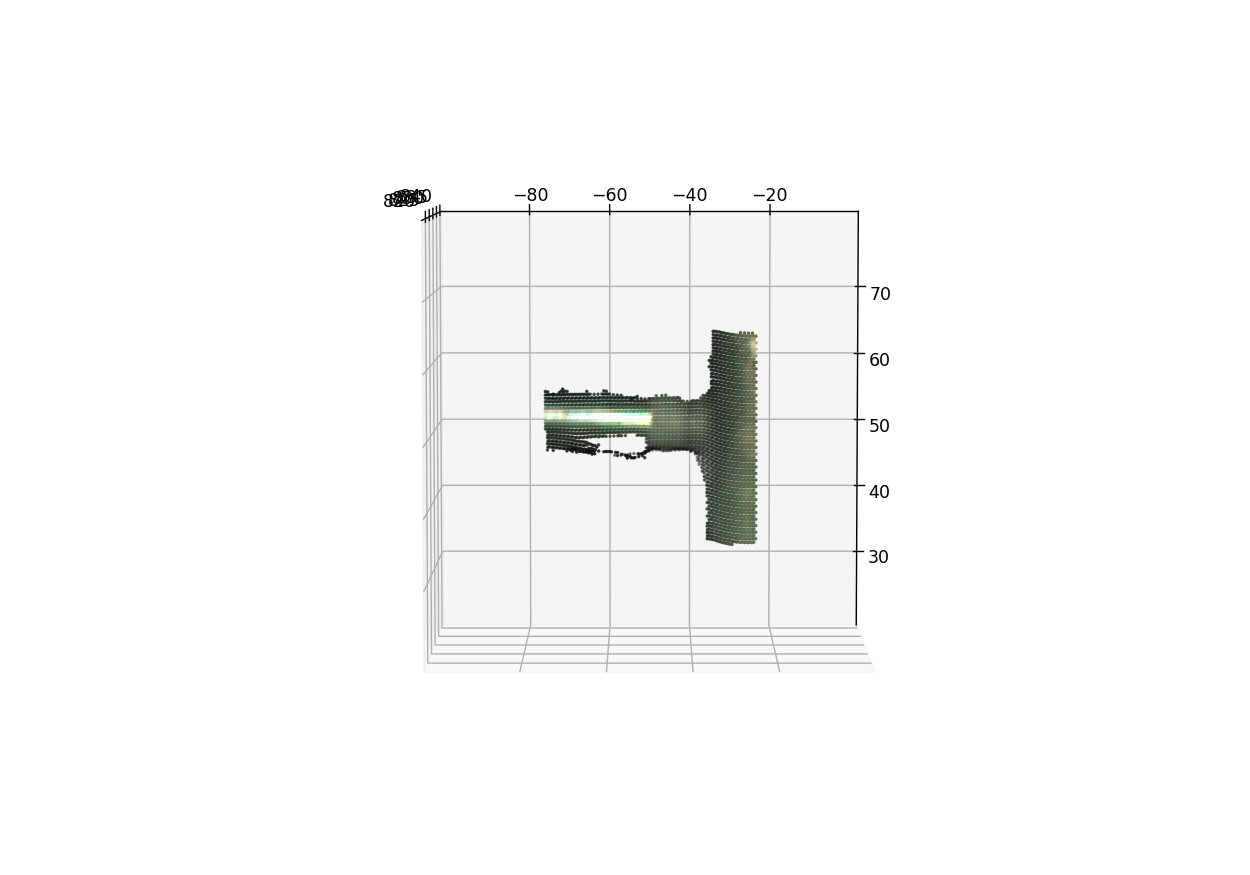

In [7]:
# Extract T-joint (manually look at where points lie in between).
feature = df_copy[(df_copy['x'].between(35, 65)) & (df_copy['y'].between(-75, -25)) & (df_copy['z'].between(820, 835))]

# Visualize extracted feature.
visualize_pcd(feature, 0.5)

# Export feature point cloud.
feature = feature.drop(['color'], axis=1)
write_pcd_file(feature, 'feature-tjoint.pcd.txt')

<IPython.core.display.Javascript object>


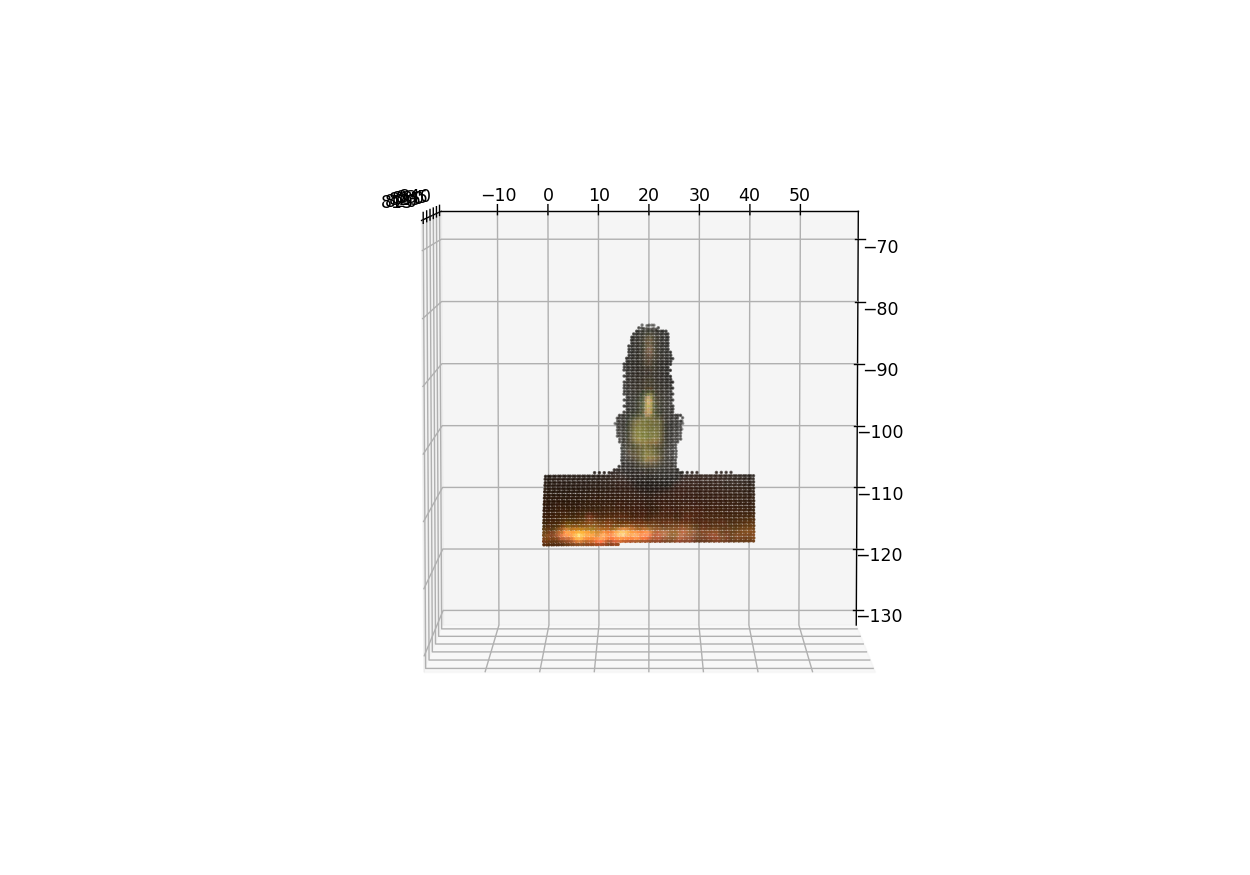

In [8]:
# Extract other T-joint (manually look at where points lie in between).
feature = df_copy[(df_copy['x'].between(-115, -80)) & (df_copy['y'].between(0, 40)) & (df_copy['z'].between(810, 835))]

# Visualize extracted feature.
visualize_pcd(feature, 0.5)

# Export feature point cloud.
feature = feature.drop(['color'], axis=1)
write_pcd_file(feature, 'feature-tjoint2.pcd.txt')

<IPython.core.display.Javascript object>


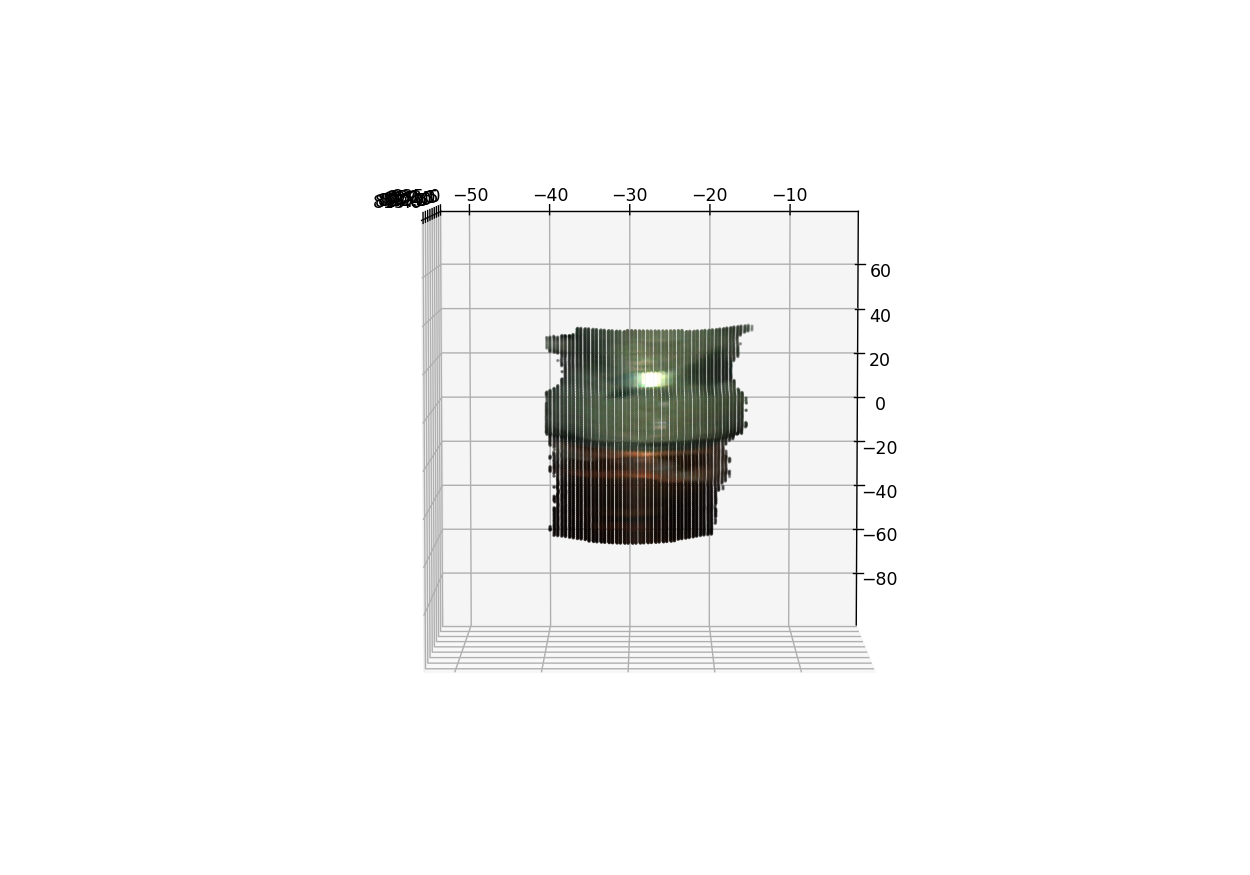

In [9]:
# Extract material change (manually look at where points lie in between).
feature = df_copy[(df_copy['x'].between(-55, 35)) & (df_copy['y'].between(-40, -15)) & (df_copy['z'].between(815, 830))]

# Visualize extracted feature.
visualize_pcd(feature, 0.5)

# Export feature point cloud.
feature = feature.drop(['color'], axis=1)
write_pcd_file(feature, 'feature-mat.pcd.txt')

<IPython.core.display.Javascript object>


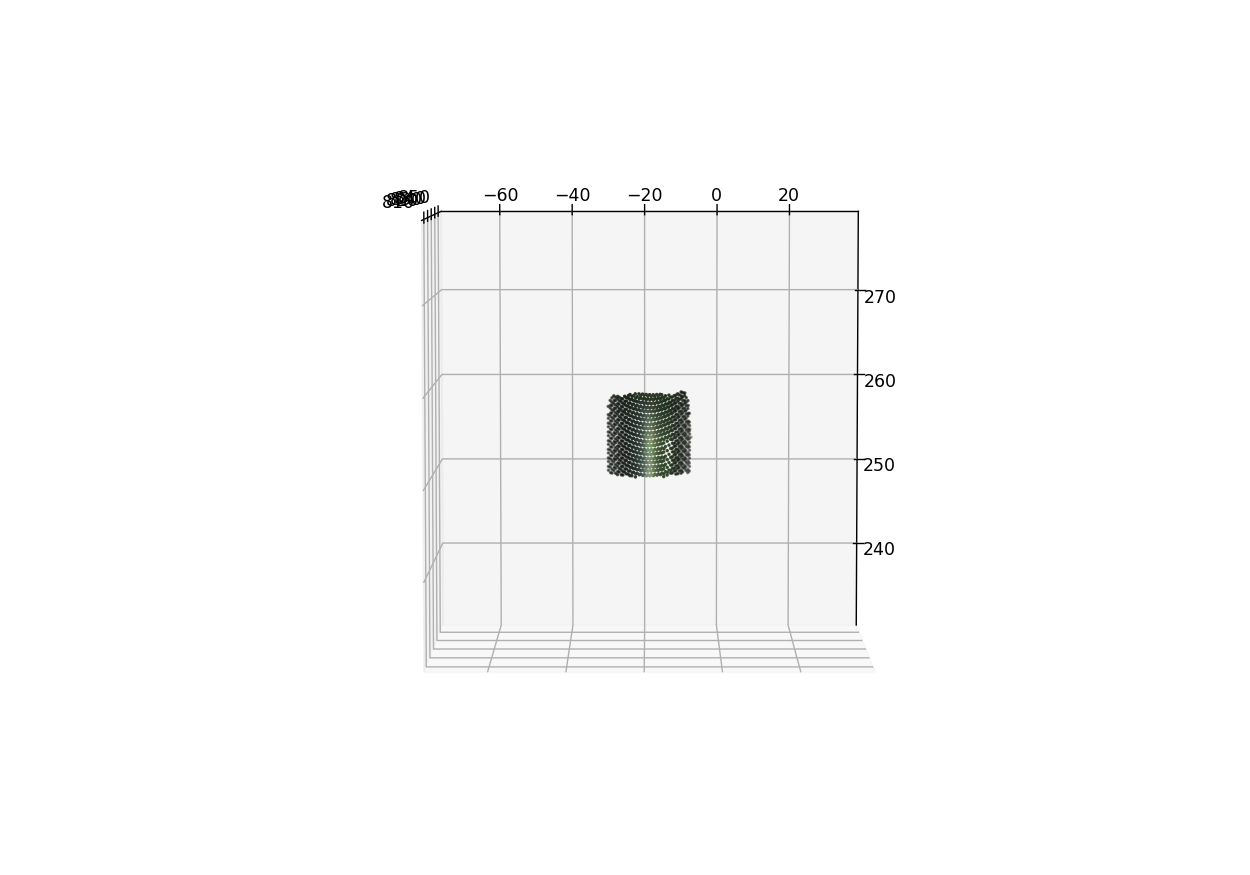

In [10]:
# Extract cap (manually look at where points lie in between).
feature = df_copy[(df_copy['x'].between(250, 265)) & (df_copy['y'].between(-40, 0))]

# Visualize extracted feature.
visualize_pcd(feature, 2)

# Export feature point cloud.
feature = feature.drop(['color'], axis=1)
write_pcd_file(feature, 'feature-cap.pcd.txt')

<IPython.core.display.Javascript object>


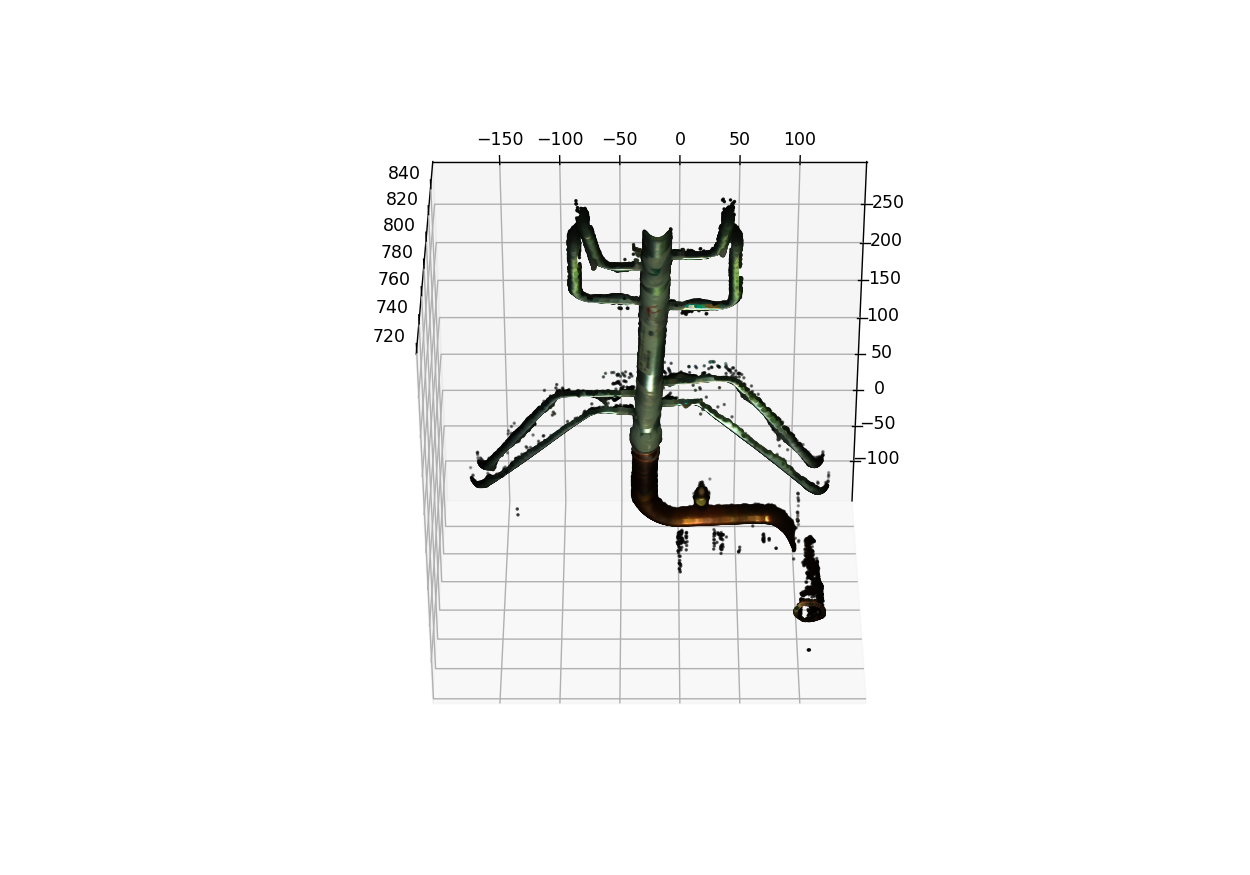

In [11]:
# Animate manifold rotating (better views of manifold).

# x is the frame number.
def animate(x):
    ax.view_init(x*-7.5, 0)
    
fig = plt.figure(figsize=(10, 7))
ax = plt.axes(projection='3d')

ax.scatter3D(df_copy['x'], df_copy['y'], df_copy['z'], s=1, color=df_copy['color'])
ax.view_init(0, 0)
    
anim = animation.FuncAnimation(fig, animate, frames=360, interval=1, blit=False)

plt.show()